In [1]:
import pandas as pd

In [5]:
data = pd.read_csv('data/visits.csv', sep='\t')
data['date_time'] = pd.to_datetime(data['date_time'],  format='%Y%m%dT%H%M%S')
data

,date_time,id,time_spent,name
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк
...,...,...,...,...
317099,2018-04-08 05:31:33,9cdb5039,11.0,Гейхера
317100,2018-04-03 02:13:53,9cdb5039,181.0,Гейхера
317101,2018-04-08 06:26:36,9cdb5039,252.0,Гейхера
317102,2018-04-05 23:24:25,9cdb5039,29.0,Гейхера


#### 1. Проблема: в выборке есть АЗС, на которых длительность большинства заездов короче 60 секунд.
- Что нужно сделать: исключить эти АЗС из анализа. Так будет меньше шансов получить необъективные результаты, поскольку коротких заездов в целом больше всего.
- Правило: исключаются из анализа те АЗС, на которых длительность половины или более заездов короче 60 секунд. Если бы вы писали отчёт, это предложение непременно вошло бы в него.

Примените правило на практике. Сначала из таблицы too_fast_stat получите id станций, которые не нарушают правило. Затем используйте эти id, чтобы отфильтровать таблицу data.
Выполните следующие шаги:
- Создайте переменную good_ids и поместите в неё те строки из too_fast_stat, где too_fast меньше 50%. Не забывайте, что в таблице data too_fast является булевым значением и атрибутом заезда, но в таблице too_fast_stat too_fast — это процент заездов, длительность которых короче 60 секунд, и атрибут заправочной станции.
- Создайте переменную good_data и поместите в неё те строки из data, где в good_ids.index находится id. Другими словами, соберите все заезды, не нарушающие правило.
- Распечатайте число строк в data, а затем и число строк в good_data.

In [6]:
data['too_fast'] = data['time_spent'] < 60
data

,date_time,id,time_spent,name,too_fast
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,False
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,True
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,False
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк,True
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк,True
...,...,...,...,...,...
317099,2018-04-08 05:31:33,9cdb5039,11.0,Гейхера,True
317100,2018-04-03 02:13:53,9cdb5039,181.0,Гейхера,False
317101,2018-04-08 06:26:36,9cdb5039,252.0,Гейхера,False
317102,2018-04-05 23:24:25,9cdb5039,29.0,Гейхера,True


In [9]:
too_fast_stat = data.pivot_table(index='id', values='too_fast')
too_fast_stat

,too_fast
id,
00ca1b70,0.250000
011f7462,0.637489
015eaddd,0.726190
0178ce70,0.211538
018a83ef,0.510269
...,...
fbbd8cc2,0.239669
fc4b1b72,0.191136
fc661c22,0.912344


In [10]:
good_ids = too_fast_stat[too_fast_stat['too_fast'] < 0.5]
good_ids

,too_fast
id,
00ca1b70,0.250000
0178ce70,0.211538
01abf4e9,0.268293
030a9067,0.330435
03740f2d,0.261261
...,...
fb6610be,0.265651
fbbd8cc2,0.239669
fc4b1b72,0.191136


In [11]:
good_data = data.query('id in @good_ids.index')
good_data

,date_time,id,time_spent,name,too_fast
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,False
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,True
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,False
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк,True
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк,True
...,...,...,...,...,...
317099,2018-04-08 05:31:33,9cdb5039,11.0,Гейхера,True
317100,2018-04-03 02:13:53,9cdb5039,181.0,Гейхера,False
317101,2018-04-08 06:26:36,9cdb5039,252.0,Гейхера,False
317102,2018-04-05 23:24:25,9cdb5039,29.0,Гейхера,True


#### 2. Проблема: в выборке есть аномально быстрые и аномально медленные заезды. Скорее всего, их совершали не те, кто приезжал просто заправиться.
- Что нужно сделать: исключить эти заезды из анализа, чтобы получить более точные показатели. Аномальные значения могут влиять на средние значения и медианы.
- Правило: заезды, длительность которых короче 60 секунд и длиннее 1000 секунд, исключаются из анализа — это предложение тоже вошло бы в отчёт.

Примените новое правило и получите выборку без аномальных заездов.
Выполните следующие шаги:

- С помощью функции query() обновите таблицу good_data, выбрав строки, где time_spent в диапазоне между 60 и 1000 секунд. - - Убедитесь, что заезды длительностью по 60 и 1000 секунд тоже включены.
- Выведите на экран число строк в обновлённой good_data.

In [13]:
good_data = good_data[(good_data['time_spent'] >= 60) & (good_data['time_spent'] <= 1000)]
good_data

,date_time,id,time_spent,name,too_fast
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,False
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,False
6,2018-04-02 08:23:21,76144fb2,555.0,Василёк,False
7,2018-04-07 00:34:08,76144fb2,286.0,Василёк,False
9,2018-04-05 13:19:39,76144fb2,248.0,Василёк,False
...,...,...,...,...,...
317096,2018-04-05 07:08:49,9cdb5039,157.0,Гейхера,False
317097,2018-04-03 09:52:56,9cdb5039,179.0,Гейхера,False
317098,2018-04-03 13:39:14,9cdb5039,198.0,Гейхера,False
317100,2018-04-03 02:13:53,9cdb5039,181.0,Гейхера,False


#### 3. В предыдущих задачах вы выбросили из набора данных отдельные заезды и даже целые АЗС ради более реалистичной оценки. Проверьте, помогло ли это. Постройте гистограмму распределения медианной длительности заправки по всем АЗС.
Выполните следующие шаги:
Создайте переменную good_stations_stat и поместите в неё данные из таблицы с медианными значениями time_spent по каждой АЗС. Не забудьте рассчитать медианы по good_data.
Постройте гистограмму на 50 корзин по этим медианным значениям.

<AxesSubplot:>

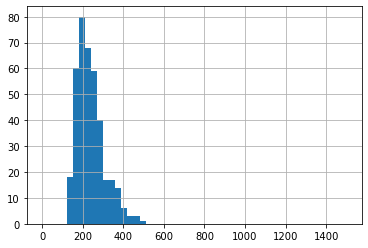

In [22]:
good_stations_stat = good_data.pivot_table(index='id', values='time_spent', aggfunc='median')
good_stations_stat['time_spent'].hist(bins=50, range=(0, 1500))

#### 4. Как вы помните, цель вашего анализа — определить сети заправок, где водители задерживаются надолго. Рассчитайте медианную продолжительность заезда для каждой сети и выведите на экран список в порядке возрастания.
Выполните следующие шаги:
- Создайте переменную good_stat и поместите в неё данные из таблицы с медианными значениями time_spent в каждой сети, то есть по соответствующим названиям name.
- Рассчитайте медианы по good_data.
- Выведите на экран таблицу good_stat, отсортировав её по возрастанию медианного времени.

In [24]:
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
good_stat.sort_values(by='time_spent', ascending=True)

,time_spent
name,
Белоцветник,154.0
Бальзамин,158.0
Незабудка,161.0
Колокольчик,161.0
Обриета,167.0
Функия,171.5
Гацания,178.5
Аммобиум,180.5
Пион,180.5


#### 5. Bы рассчитывали медианы по АЗС. Теперь нужно рассчитать медиану этих медиан по каждой сети. Это даст ещё один показатель «типичной» медианной длительности заездов в каждой сети: медиану распределения медианной длительности заездов на АЗС.
Из этого распределения медиан нужно будет исключить медианные значения, рассчитанные для АЗС с совсем небольшим числом заездов. Создайте таблицу со статистикой по АЗС, с помощью которой выявите и отфильтруйте эти лишние станции.
Выполните следующие шаги:
- Создайте переменную station_stat_full, которая для каждой АЗС хранит название сети, число заездов и лучший показатель медианной длительности заправки. Подсказка: название сети и число заездов есть в id_name, а лучший показатель медианной длительности заправки — в good_stations_stat. 
- Объедините эти две таблицы.
- Выведите на экран первые 5 строк, чтобы посмотреть новую таблицу.

In [27]:
id_name = good_data.pivot_table(index='id', values='name', aggfunc=['first', 'count'])
id_name.columns = ['name', 'count']
station_stat_full = id_name.join(good_stations_stat)
station_stat_full

,name,count,time_spent
id,,,
00ca1b70,Вероника,131,166.0
0178ce70,Василёк,164,234.5
01abf4e9,Гацания,30,181.5
030a9067,Колокольчик,228,135.5
03740f2d,Василёк,157,289.0
...,...,...,...
fb6610be,Колокольчик,426,161.0
fbbd8cc2,Роза,82,454.5
fc4b1b72,Василёк,543,340.0
